4


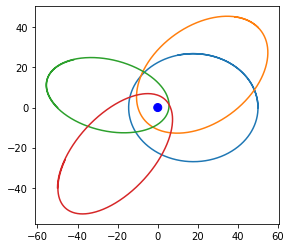

In [56]:
%matplotlib inline

import numpy
import numpy.linalg
import matplotlib.pyplot as plt

G = 50.0  # гравитационная постоянная
collision_distance = 3.0  # всё-таки это не точки
model_delta_t = 0.01
time_to_model = 10

class MaterialPoint:
    """Материальная точка, движущаяся по двумерной плоскости"""
    
    def __init__(self, mass: 'float', position: 'numpy.array', velocity: 'numpy.array'):
        # Аннотации типов по желанию, но могут помочь IDE и компилятору, когда таковые имеются
        self.mass = mass
        self.position = position
        self.velocity = velocity
    
    @staticmethod
    def gravity_dencity(dist: 'float')-> 'float':
        if dist > collision_distance:
            return G / dist ** 2
        else:
            return -G / dist ** 3 # будем считать, что отскакивают точки друг от друга резко, но стараться не допускать этого
    
    def force_induced_by_other(self, other: 'MaterialPoint')-> 'numpy.array':
        delta_p = other.position - self.position
        distance = numpy.linalg.norm(delta_p)  # Евклидова норма (по теореме Пифагора)
        force_direction = delta_p / distance
        # @staticmethod позволяет вызвать статический метод от self, не зная точного типа
        force = force_direction * self.mass * other.mass * self.gravity_dencity(distance)
        return force
    
    def advance(self):
        # print(self.position)
        self.position += self.velocity * model_delta_t

    def apply_force(self, force: 'numpy.array'):
        # print(force)
        self.velocity += force * model_delta_t / self.mass


centrum = MaterialPoint(500.0, numpy.array([0.0, 0.0]), numpy.array([0.0, 0.0]))
bt = ((10.0,50.0,0.0,0.0,15.0),(10.0,50.0,40.0,-7.0,7.0),(10.0,-50.0,0.0,-10.0,10.0),(10.0,-50.0,-40.0,0.0,10.0))
Bodies = []
for i in range(0,len(bt)):
    Bodies.append(MaterialPoint(bt[i][0], numpy.array([bt[i][1], bt[i][2]]), numpy.array([bt[i][3], bt[i][4]])))

def model_step():
    for i in range(0,len(Bodies)):
        Bodies[i].apply_force(Bodies[i].force_induced_by_other(centrum))
        Bodies[i].advance()

coords = []
for i in range(0,len(Bodies)):
    coords.append(([],[]))
#print(coords)
#xs_1 = []
#ys_1 = []
#xs_2 = []
#ys_2 = []
for stepn in range(int(time_to_model / model_delta_t)):
    for i in range(0,len(Bodies)):
        coords[i][0].append(Bodies[i].position[0])
        coords[i][1].append(Bodies[i].position[1])
    model_step()

c = plt.Circle((0, 0), 2, color='b')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')
ax.add_patch(c)

for i in range(0,len(Bodies)):
    plt.plot(coords[i][0],coords[i][1])



plt.show()

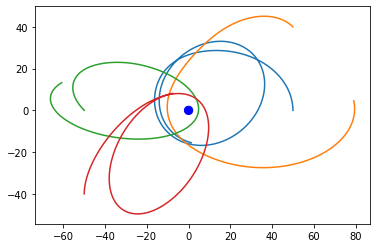

In [62]:
%matplotlib inline

import numpy
import numpy.linalg
import matplotlib.pyplot as plt

G = 50.0  # гравитационная постоянная
collision_distance = 3.0  # всё-таки это не точки
model_delta_t = 0.01
time_to_model = 10

class MaterialPoint:
    """Материальная точка, движущаяся по двумерной плоскости"""
    
    def __init__(self, mass: 'float', position: 'numpy.array', velocity: 'numpy.array'):
        # Аннотации типов по желанию, но могут помочь IDE и компилятору, когда таковые имеются
        self.mass = mass
        self.position = position
        self.velocity = velocity
    
    @staticmethod
    def gravity_dencity(dist: 'float')-> 'float':
        if dist > collision_distance:
            return G / dist ** 2
        else:
            return -G / dist ** 3 # будем считать, что отскакивают точки друг от друга резко, но стараться не допускать этого
    
    def force_induced_by_other(self, other: 'MaterialPoint')-> 'numpy.array':
        delta_p = other.position - self.position
        distance = numpy.linalg.norm(delta_p)  # Евклидова норма (по теореме Пифагора)
        force_direction = delta_p / distance
        # @staticmethod позволяет вызвать статический метод от self, не зная точного типа
        force = force_direction * self.mass * other.mass * self.gravity_dencity(distance)
        return force
    
    def advance(self):
        # print(self.position)
        self.position += self.velocity * model_delta_t

    def apply_force(self, force: 'numpy.array'):
        # print(force)
        self.velocity += force * model_delta_t / self.mass


centrum = MaterialPoint(500.0, numpy.array([0.0, 0.0]), numpy.array([0.0, 0.0]))
bt = ((10.0,50.0,0.0,0.0,15.0),(10.0,50.0,40.0,-7.0,7.0),(10.0,-50.0,0.0,-10.0,10.0),(10.0,-50.0,-40.0,0.0,10.0))
Bodies = []
for i in range(0,len(bt)):
    Bodies.append(MaterialPoint(bt[i][0], numpy.array([bt[i][1], bt[i][2]]), numpy.array([bt[i][3], bt[i][4]])))


def model_step():
    for i in range(0,len(Bodies)):
        Bodies[i].apply_force(Bodies[i].force_induced_by_other(centrum))
        for j in range(0,len(Bodies)):
            if (i != j):
                Bodies[i].apply_force(Bodies[i].force_induced_by_other(Bodies[j]))
        Bodies[i].advance()

coords = []
for i in range(0,len(Bodies)):
    coords.append(([],[]))


for stepn in range(int(time_to_model / model_delta_t)):
    for i in range(0,len(Bodies)):
        coords[i][0].append(Bodies[i].position[0])
        coords[i][1].append(Bodies[i].position[1])
    model_step()

c = plt.Circle((0, 0), 2, color='b')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')
ax.add_patch(c)

for i in range(0,len(Bodies)):
    plt.plot(coords[i][0],coords[i][1])



plt.show()